In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
df = pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [10]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [12]:
df.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Departments              14999
salary                   14999
dtype: int64

In [13]:
left = df.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


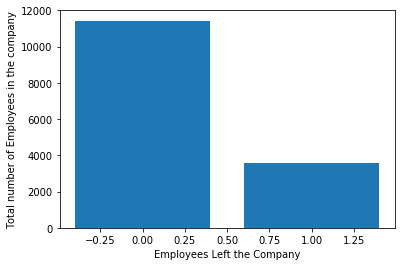

In [16]:
lCount=df.groupby('left').count()
plt.bar(lCount.index.values, lCount['satisfaction_level'])
plt.xlabel('Employees Left the Company')
plt.ylabel('Total number of Employees in the company')
plt.show()

In [20]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

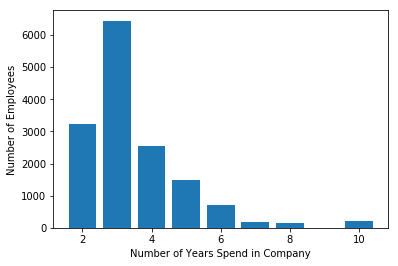

In [22]:
time_spent=df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

In [27]:
from sklearn.cluster import KMeans
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

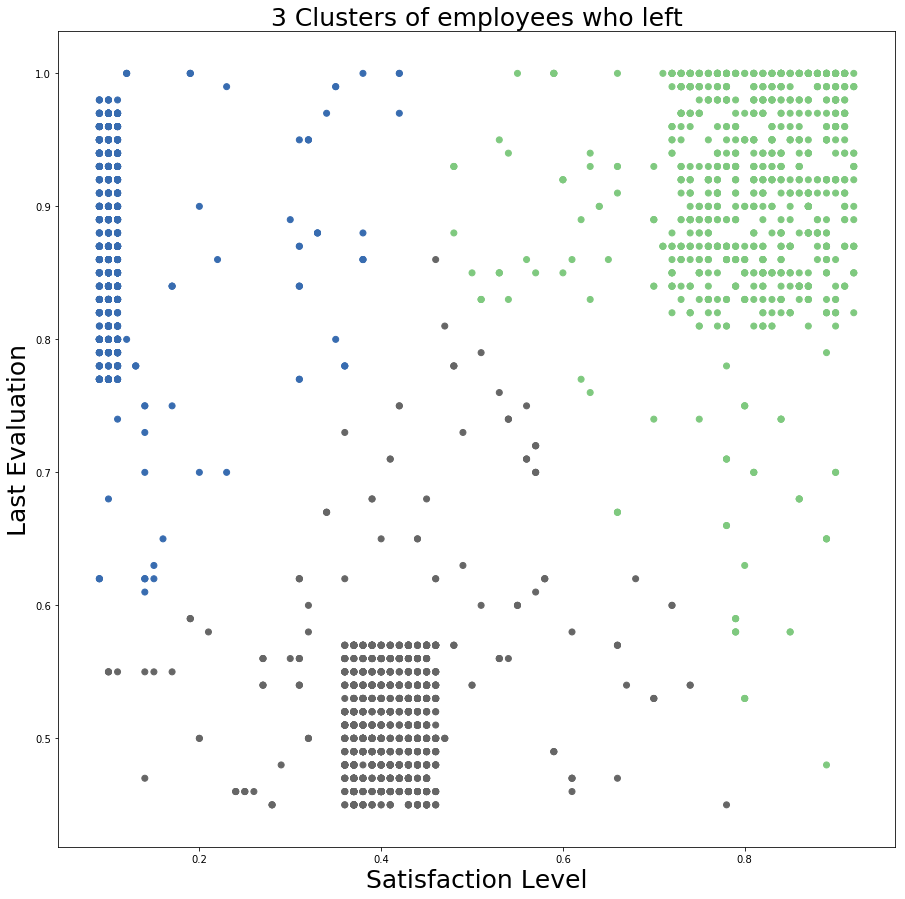

In [39]:
left_emp['label'] = kmeans.labels_
plt.figure(figsize=(15,15))
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level', fontsize=25)
plt.ylabel('Last Evaluation',fontsize=25)
plt.title('3 Clusters of employees who left' ,fontsize=25)
plt.show()

In [31]:
from sklearn import preprocessing
lemployee = preprocessing.LabelEncoder()
df['salary']=lemployee.fit_transform(df['salary'])
df['Departments']=lemployee.fit_transform(df['Departments '])

In [40]:
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=df['left']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
rg = DecisionTreeRegressor(random_state=0)
rg.fit(X_train, y_train)
y_pred = rg.predict(X_test)
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [55]:
from sklearn import metrics
print("Acu:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Acu: 97.46666666666667
Precision: 93.6247723132969
Recall: 95.8955223880597
